In [15]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve,  accuracy_score, confusion_matrix, classification_report



In [6]:
import os
print(os.getcwd())  # Esto imprime el directorio desde el que se está ejecutando el código
base_dir = os.getcwd()  # Directorio del script actual
X_train_balanced = pd.read_csv(os.path.join(base_dir, '../../Data/processed/logistic_regression/X_train_balanced.csv'))
y_train_balanced = pd.read_csv(os.path.join(base_dir, '../../Data/processed/logistic_regression/y_train_balanced.csv'))

c:\Users\Fernando\Desktop\Yo\Programacion\proyectos\fraude_tarjetas\1st\src\models


In [11]:
X_test = pd.read_csv(os.path.join(base_dir, '../../Data/processed/logistic_regression/X_test.csv'))

In [9]:
model = LogisticRegression(random_state=42, solver='saga')

In [10]:
#Entrenando Modelo
model.fit(X_train_balanced, y_train_balanced)


c:\Users\Fernando\Desktop\Yo\Programacion\proyectos\fraude_tarjetas\1st\env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Fernando\Desktop\Yo\Programacion\proyectos\fraude_tarjetas\1st\env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=42, solver='saga')

In [12]:
y_pred = model.predict(X_test)


In [17]:
y_test = pd.read_csv(os.path.join(base_dir, '../../Data/processed/logistic_regression/y_test.csv'))

In [18]:
# Exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy: 0.9748
Confusion Matrix:
[[55435  1429]
 [    8    90]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



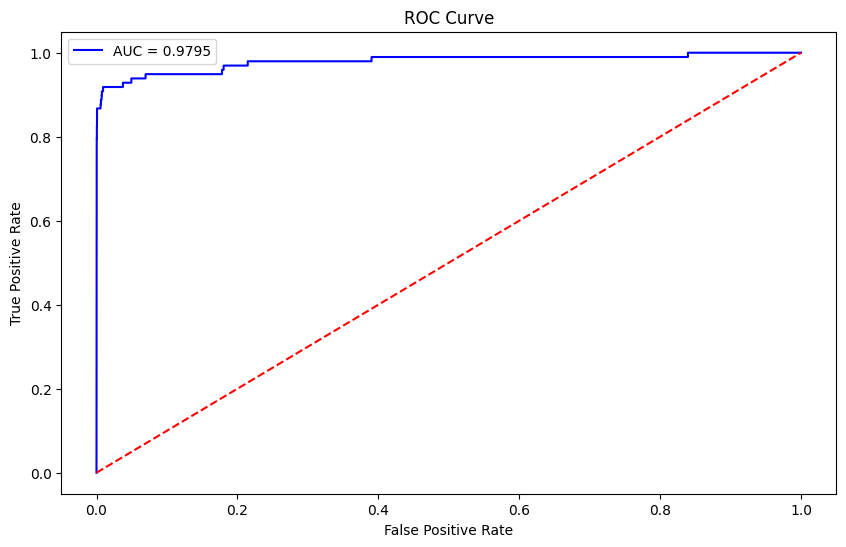

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular la probabilidad de cada clase
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
